#Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation

##Importing dataset into dataframe

In [2]:
data = pd.read_csv('/content/car sales.csv')

data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


##Data Cleansing

In [3]:
# checking for Null or missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [4]:
data.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


There is only 1 null data, and it is only the Customer Name that does not affect the calculation.

##Outlier

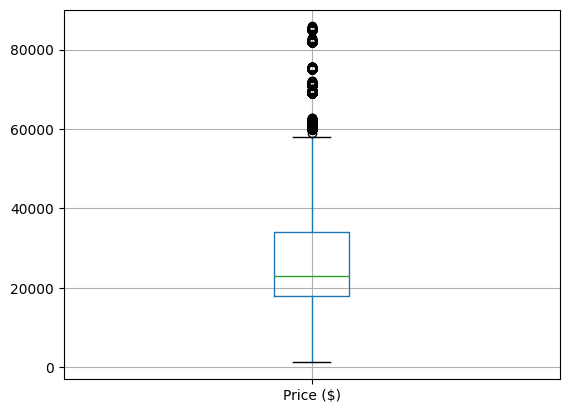

In [5]:
data.boxplot(column='Price ($)')
plt.show()

Although there are many outliers, they do not need to be removed because car prices vary greatly

# Exploratory Data Analysis

1. What combination of specifications can generate the maximum profit?
2. To find out whether customers with higher income tend to buy cars at higher prices or not.
3. Looking for seasonal patterns or car sales trends based on specific times.


### 1. What combination of specifications can generate the maximum profit?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

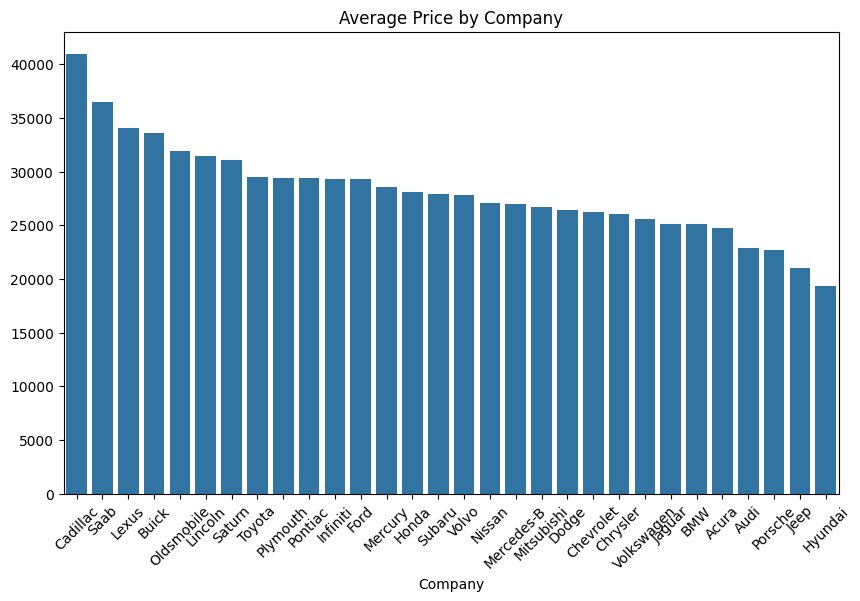

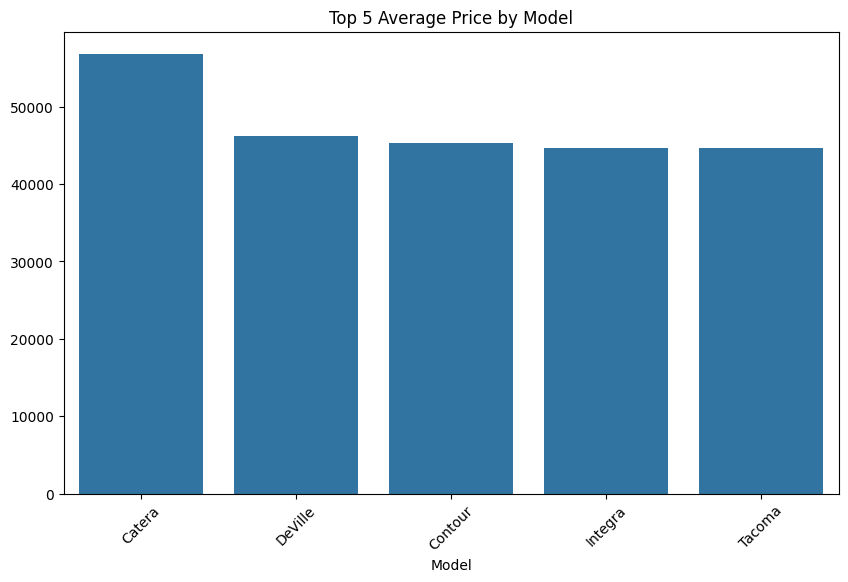

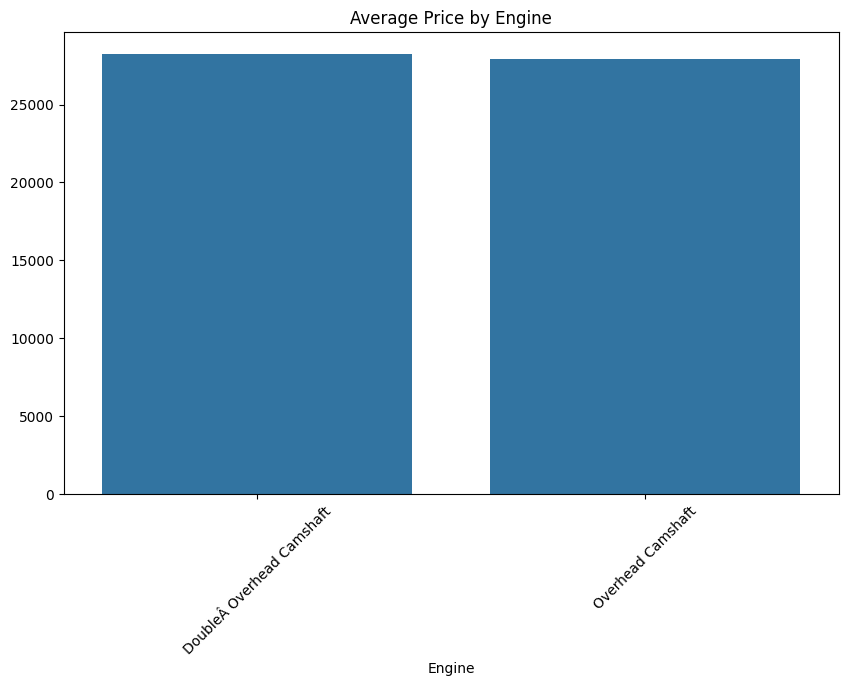

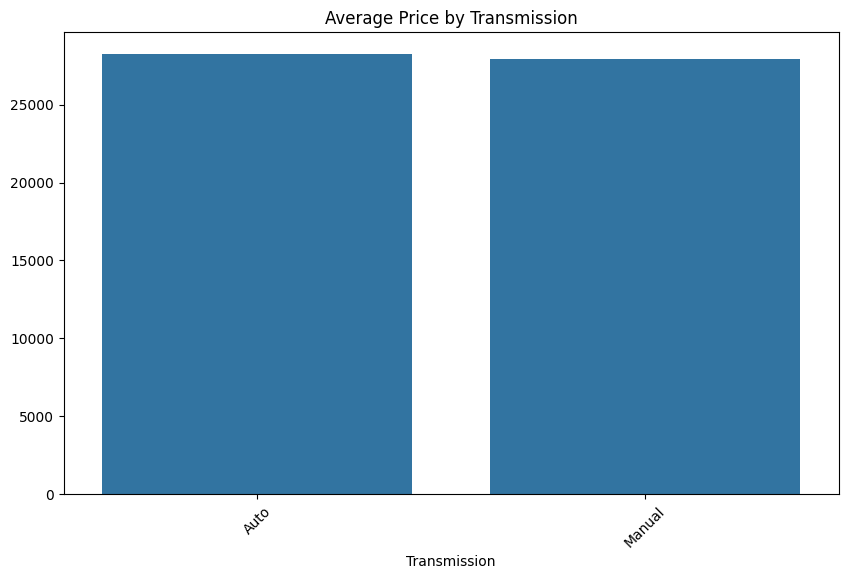

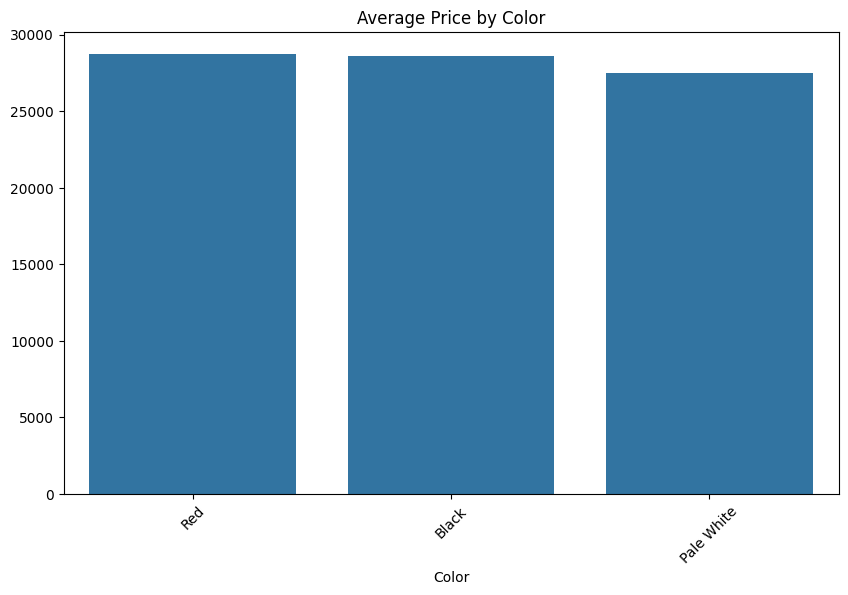

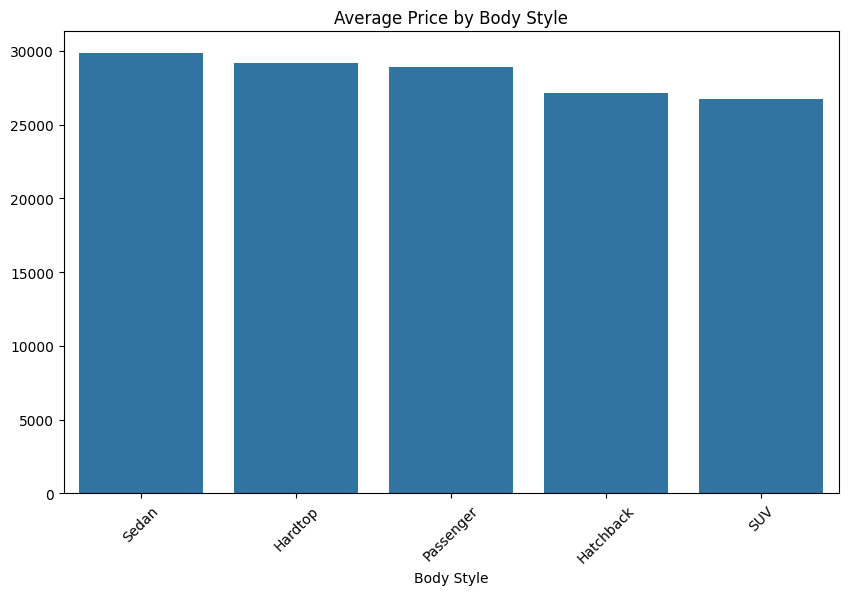

In [6]:

df = data

# Menampilkan beberapa data pertama untuk memahami struktur
print(df.head())

# Menghitung rata-rata harga berdasarkan 'Company', 'Model', 'Engine', 'Transmission', 'Color', dan 'Body Style'
average_price_by_company = df.groupby('Company')['Price ($)'].mean().sort_values(ascending=False)
average_price_by_model = df.groupby('Model')['Price ($)'].mean().sort_values(ascending=False)
average_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
average_price_by_transmission = df.groupby('Transmission')['Price ($)'].mean().sort_values(ascending=False)
average_price_by_color = df.groupby('Color')['Price ($)'].mean().sort_values(ascending=False)
average_price_by_body_style = df.groupby('Body Style')['Price ($)'].mean().sort_values(ascending=False)

# Menampilkan hasil
print("Average Price by Company:\n", average_price_by_company.head())
print("Average Price by Model:\n", average_price_by_model.head(5))
print("Average Price by Engine:\n", average_price_by_engine.head())
print("Average Price by Transmission:\n", average_price_by_transmission.head())
print("Average Price by Color:\n", average_price_by_color.head())
print("Average Price by Body Style:\n", average_price_by_body_style.head())

# Visualisasi menggunakan barplot
plt.figure(figsize=(10,6))
sns.barplot(x=average_price_by_company.index, y=average_price_by_company.values)
plt.title('Average Price by Company')
plt.xticks(rotation=45)
plt.show()

top_5_model = average_price_by_model.head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_model.index, y=top_5_model.values)
plt.title('Top 5 Average Price by Model')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=average_price_by_engine.index, y=average_price_by_engine.values)
plt.title('Average Price by Engine')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=average_price_by_transmission.index, y=average_price_by_transmission.values)
plt.title('Average Price by Transmission')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=average_price_by_color.index, y=average_price_by_color.values)
plt.title('Average Price by Color')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=average_price_by_body_style.index, y=average_price_by_body_style.values)
plt.title('Average Price by Body Style')
plt.xticks(rotation=45)
plt.show()


### 2.To find out whether customers with higher income tend to buy cars at higher prices or not.

In [ ]:
#correlation
correlation = df['Annual Income'].corr(df['Price ($)'])
print(f'Korelasi antara Pendapatan Tahunan dan Harga Mobil: {correlation}')

Korelasi antara Pendapatan Tahunan dan Harga Mobil: 0.012064959420296485


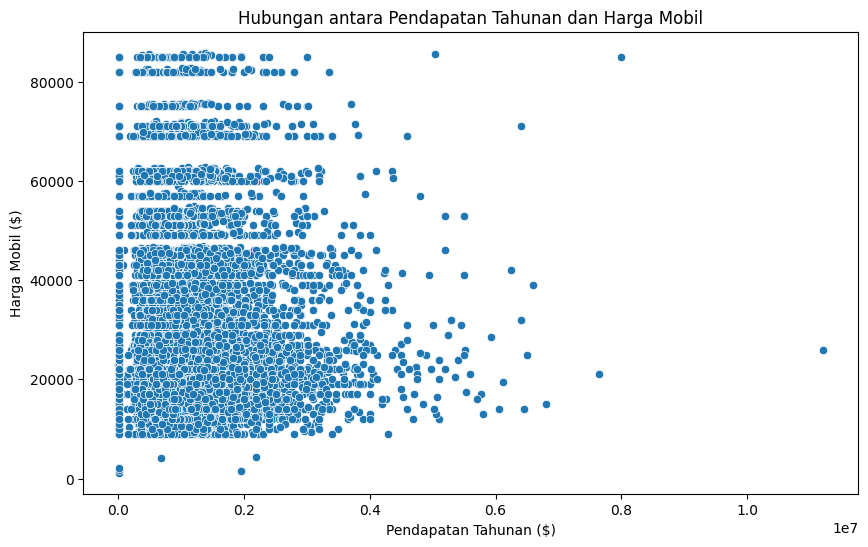

In [ ]:
# Membuat scatter plot untuk melihat hubungan antara Pendapatan dan Harga
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df)
plt.title('Hubungan antara Pendapatan Tahunan dan Harga Mobil')
plt.xlabel('Pendapatan Tahunan ($)')
plt.ylabel('Harga Mobil ($)')
plt.show()


### 3. Looking for seasonal patterns or car sales trends based on specific times.

In [9]:
df=data

df['Date'] = pd.to_datetime(df['Date'])

# Menampilkan data yang sudah diperbarui
print(df.head())

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Menampilkan data dengan bulan dan tahun
print(df[['Date', 'Month', 'Year']].head())

         Car_id       Date Customer Name Gender  Annual Income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_000002 2022-01-02           Gia   Male        1480000   
2  C_CND_000003 2022-01-02        Gianna   Male        1035000   
3  C_CND_000004 2022-01-02       Giselle   Male          13500   
4  C_CND_000005 2022-01-02         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black     

In [10]:
# Menghitung jumlah mobil terjual per bulan
sales_by_month = df.groupby('Month')['Price ($)'].sum()

# Menampilkan hasil
print(sales_by_month)


Month
1     21696218
2     20643945
3     41705873
4     46864434
5     53221243
6     48505902
7     48178032
8     48793638
9     93635178
10    52035265
11    96979678
12    99266059
Name: Price ($), dtype: int64


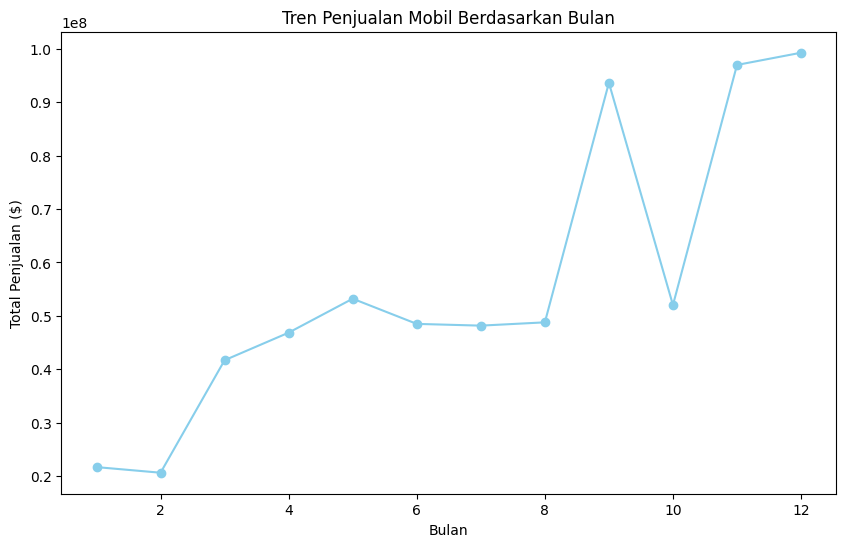

In [11]:
# Visualisasi Tren Penjualan Berdasarkan Bulan
plt.figure(figsize=(10,6))
sales_by_month.plot(kind='line', color='skyblue', marker='o')
plt.title('Tren Penjualan Mobil Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=0)
plt.show()


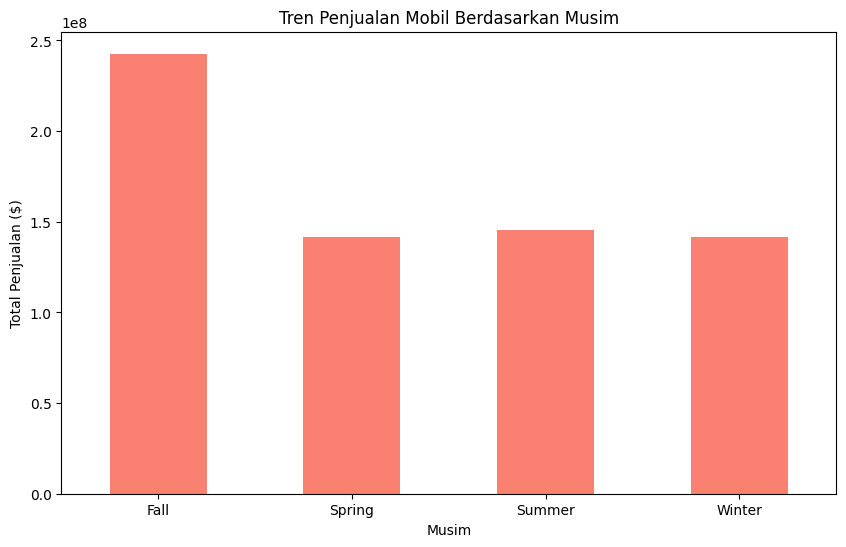

In [ ]:
# Menambahkan kolom 'Season' untuk mengategorikan bulan ke dalam musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Menghitung penjualan berdasarkan musim
sales_by_season = df.groupby('Season')['Price ($)'].sum()

# Visualisasi Tren Penjualan Berdasarkan Musim
plt.figure(figsize=(10,6))
sales_by_season.plot(kind='bar', color='salmon')
plt.title('Tren Penjualan Mobil Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=0)
plt.show()
